# 项目：纽约市Airbnb数据集

## 简介

该数据集包含了2019年纽约市的Airbnb上线的房间情况。Airbnb是一个旅行房屋租赁社区，用户可通过网站或手机APP发布、搜索度假房屋租赁信息并在线预定。

变量含义：
- `id`：房间id
- `name`：房间名称
- `host_id`：房东id
- `host_name`：房东姓名
- `neighbourhood_group`：地区
- `neighbourhood`：街区
- `latitude`：纬度坐标
- `longitude`：经度坐标
- `room_type`：房间类型
- `price`：价格（美元）
- `minimum_nights`：最少预定夜晚数
- `number_of_reviews`：评论数量
- `last_review`：最新浏览
- `reviews_per_month`：每月浏览次数
- `calculated_host_listings_count`：房东挂出房子的数量
- `availability_365`：可预定房源的天数

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./airbnb_NYC_2019.csv")

In [3]:
original_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


我们可以对数据进行以下分析：
- 价格分析：根据房间类型(`room_type`)和区域(`neighbourhood_group`)分析房价(`price`)分布情况。
- 预定情况分析：一年中房源的可预定天数(`availability_365`)与房东房源数量(`calculated_host_listings_count`)的关系。
- 评论分析：评论数量(`number_of_reviews`)与房源价格(`price`)、房间类型(`room_type`)的关系。
- 地理位置分析：不同区域房源的价格和供给情况。

## **评估和清理数据**

In [4]:
cleaned_data = original_data.copy()

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

`name`, `host_name`, `last_review `, `reviews_per_month`存在缺失值，但是与此次的分析目标无关，可以保留缺失值。

`last_review `列是日期类型，可以将其转换为 datetime 格式，方便后续时间相关分析。

### 1 缺失值处理以及数据类型的转换

In [6]:
# 检查每一列的缺失值
cleaned_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# 处理 'last_review' 缺失值：将其转换为 datetime 格式，缺失值填充为NaT
cleaned_data['last_review'] = pd.to_datetime(cleaned_data['last_review'], errors='coerce')

# 处理 'reviews_per_month' 缺失值：可以用0填充表示没有评论，也可以根据需要选择其他策略
cleaned_data['reviews_per_month'].fillna(0, inplace=True)

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

### 2 重复值检查

In [9]:
cleaned_data.duplicated().sum()

0

### 3 列的合理性

In [10]:
# 查看 'room_type' 和 'neighbourhood_group' 列的唯一值，检查是否有拼写错误或不一致
print(cleaned_data['room_type'].unique())
print(cleaned_data['neighbourhood_group'].unique())

# 可以手动检查并修正错误的拼写（如果有的话）

['Private room' 'Entire home/apt' 'Shared room']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


### 4 异常值检查

In [11]:
# 查看价格的统计描述，找到极端高或极端低的值
price_description = cleaned_data['price'].describe()
print(price_description)

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


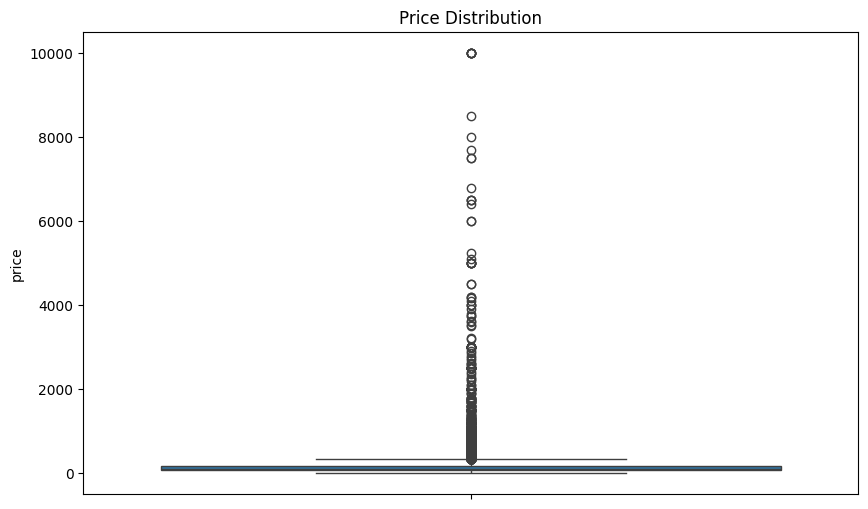

In [12]:
# 可视化价格分布，查看是否有极端异常值
plt.figure(figsize=(10,6))
sns.boxplot(cleaned_data['price'])
plt.title('Price Distribution')
plt.show()

通过设置上下限来过滤掉非常高或非常低的异常价格

In [13]:
# 使用四分位数和IQR来确定上下限
Q1 = cleaned_data['price'].quantile(0.25)
Q3 = cleaned_data['price'].quantile(0.75)
IQR = Q3 - Q1

# 设置上限和下限，常用 1.5 * IQR 作为标准，也可以调整
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 过滤掉价格异常值
cleaned_data = cleaned_data[(cleaned_data['price'] >= lower_bound) & (cleaned_data['price'] <= upper_bound)]

print(f"数据清理后，剩余的记录数: {cleaned_data.shape[0]}")

数据清理后，剩余的记录数: 45923


## **数据分析**

### 1 价格分析

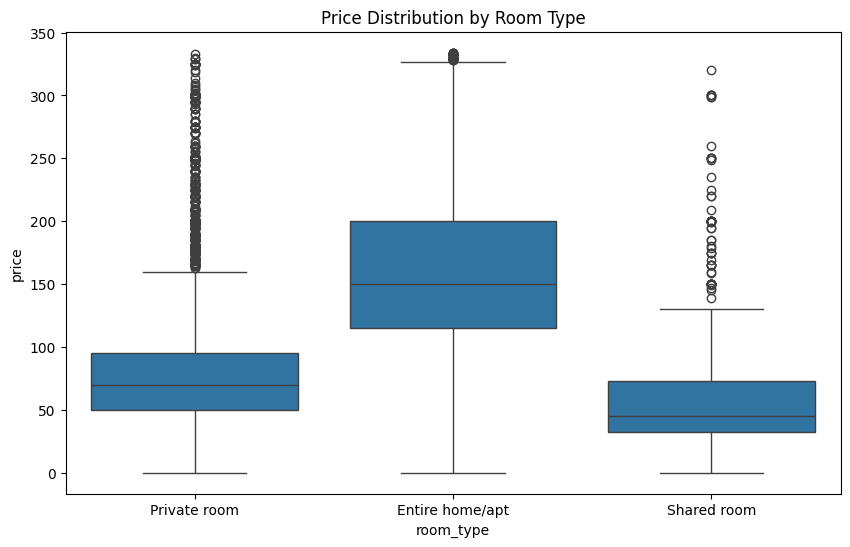

In [14]:
# 价格分布：按房间类型
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=cleaned_data)
plt.title('Price Distribution by Room Type')
plt.show()

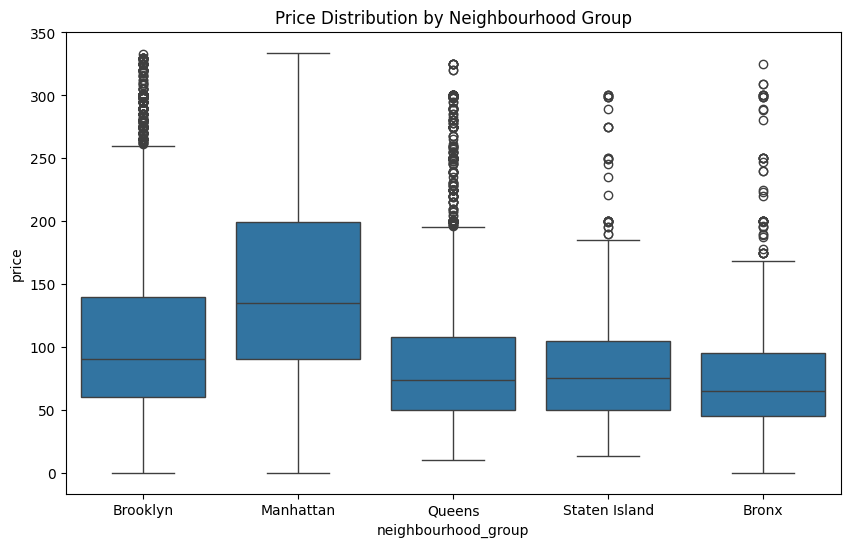

In [15]:
# 价格分布：按区域
plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood_group', y='price', data=cleaned_data)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

### 2 预定情况分析

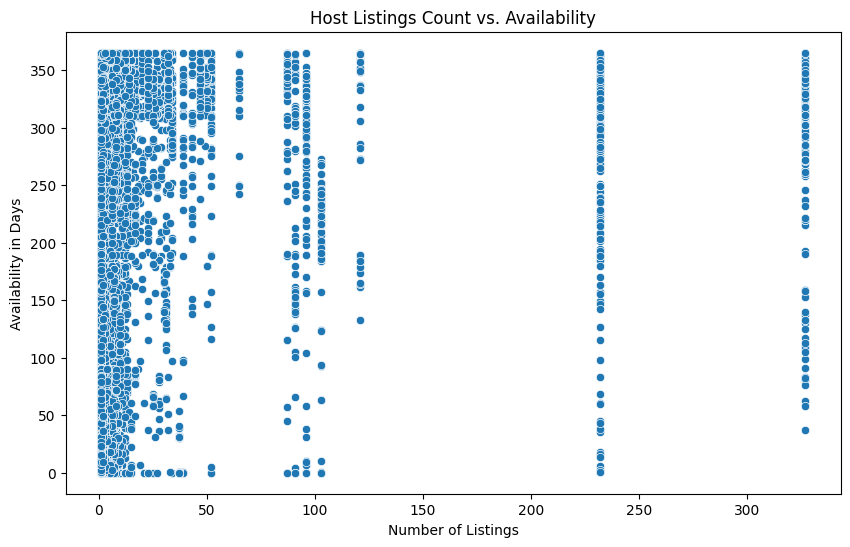

In [16]:
# 可以使用散点图来分析房东拥有的房源数量与可预定天数的关系
plt.figure(figsize=(10,6))
sns.scatterplot(x='calculated_host_listings_count', y='availability_365', data=cleaned_data)
plt.title('Host Listings Count vs. Availability')
plt.xlabel('Number of Listings')
plt.ylabel('Availability in Days')
plt.show()

### 3 评论分析

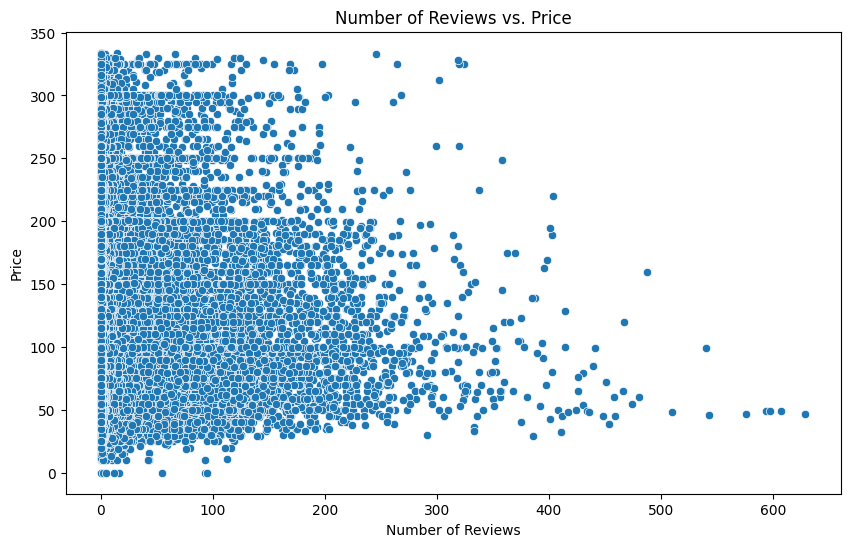

In [17]:
# 评论数量与房价关系
plt.figure(figsize=(10,6))
sns.scatterplot(x='number_of_reviews', y='price', data=cleaned_data)
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

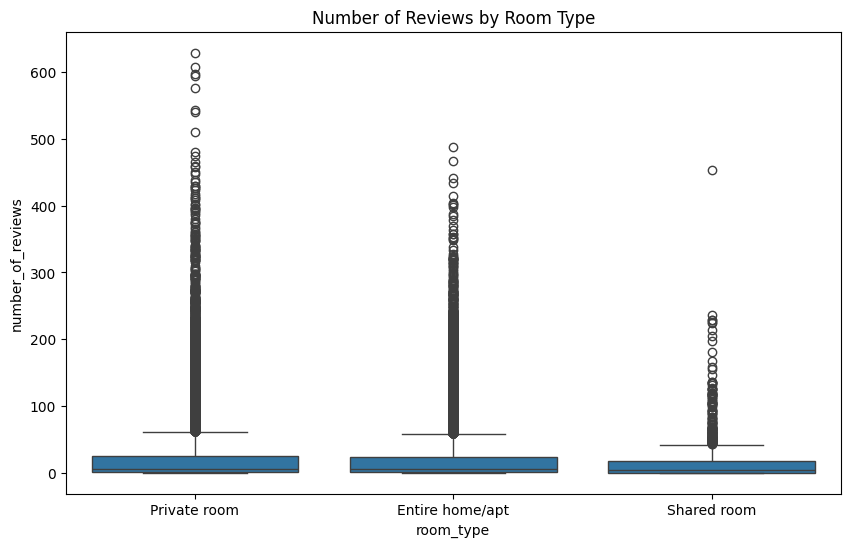

In [18]:
# 评论数量与房间类型的关系
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='number_of_reviews', data=cleaned_data)
plt.title('Number of Reviews by Room Type')
plt.show()

### 4 地理位置分析

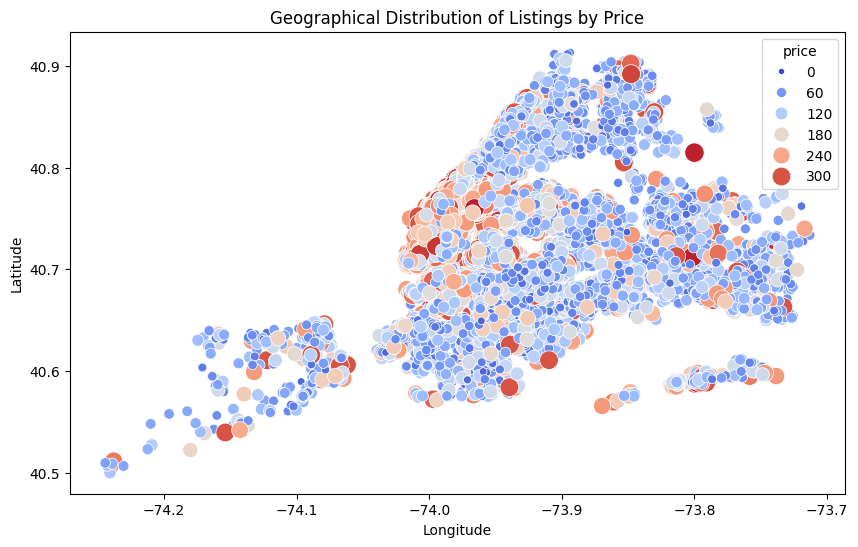

In [19]:
#使用地理位置的散点图（结合经纬度）来分析不同区域房源的分布及价格。
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=cleaned_data, palette='coolwarm', size='price', sizes=(20,200))
plt.title('Geographical Distribution of Listings by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()